In [1]:
import wisps
import numpy as np 
import matplotlib.pyplot as plt
import splat
%matplotlib inline 


In [2]:
df=wisps.Annotator.reformat_table(wisps.datasets['stars'])

In [3]:
df=df[(df.f_test  <0.4) & (df.snr1 >3.)]

In [4]:
manj=wisps.Annotator.reformat_table(wisps.datasets['manjavacas']).reset_index(drop=True)
schn=wisps.Annotator.reformat_table(wisps.datasets['schneider']).reset_index(drop=True)
ydwarfs=(manj[manj['spt'].apply(wisps.make_spt_number)>38].append(schn)).reset_index(drop=True)

In [5]:
df.keys()

Index(['CH_4/H-Cont', 'CH_4/H_2O-1', 'CH_4/H_2O-2', 'CH_4/J-Cont',
       'H-cont/H_2O-1', 'H-cont/H_2O-2', 'H-cont/J-Cont', 'H_2O-1/J-Cont',
       'H_2O-2/H_2O-1', 'H_2O-2/J-Cont', 'cdf_snr', 'f_test', 'line_chi',
       'grism_id', 'snr1', 'snr2', 'snr3', 'snr4', 'spex_chi', 'spt',
       'star_flag', 'class_star', 'F110', 'F140', 'F160', 'RA', 'DEC',
       'survey', 'x', 'pointing'],
      dtype='object')

In [6]:
df['H_2O-2+CH_4/J-cont']=df['CH_4/J-Cont']+df['H_2O-2/J-Cont']
df['H_2O-1+CH_4/H-cont']=df['CH_4/H-Cont']+1./df['H-cont/H_2O-1']
df['J-cont+H-cont']=df['H_2O-2+CH_4/J-cont']+df['H_2O-1+CH_4/H-cont']

In [7]:
ydwarfs['H_2O-2+CH_4/J-cont']=ydwarfs['CH_4/J-Cont']+ydwarfs['H_2O-2/J-Cont']
ydwarfs['H_2O-1+CH_4/H-cont']=ydwarfs['CH_4/H-Cont']+1./ydwarfs['H-cont/H_2O-1']
ydwarfs['J-cont+H-cont']=ydwarfs['H_2O-2+CH_4/J-cont']+df['H_2O-1+CH_4/H-cont']

In [8]:
from wispshapes import Box

In [9]:
b=Box()

In [10]:
tpls=ydwarfs

In [11]:
xcol, ycol=('H_2O-2+CH_4/J-cont', 'H_2O-1+CH_4/H-cont')

In [12]:
b.data=(ydwarfs[[xcol, ycol]]).reset_index(drop=True)

(-1.0, 1)

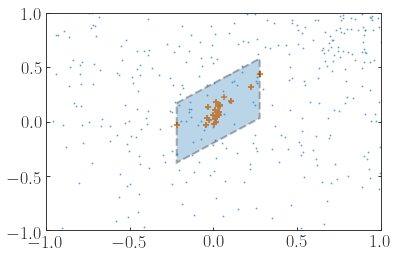

In [13]:
fig, ax=plt.subplots()
plt.scatter(df['H_2O-2+CH_4/J-cont'], df['H_2O-1+CH_4/H-cont'],s=1.,alpha=0.5)
b.plot(ax=ax)
plt.scatter(ydwarfs['H_2O-2+CH_4/J-cont'], ydwarfs['H_2O-1+CH_4/H-cont'],marker='+')
plt.xlim([-1.,1])
plt.ylim([-1.,1])

In [14]:
df=df.reset_index(drop=True)

In [15]:
dfsl=b.select((df[[xcol, ycol]]).reset_index(drop=True))

In [16]:
def plot(grismid):
    s=wisps.Source(name=grismid.replace('g141','G141'))
    if wisps.make_spt_number(s.spectral_type) > 38:
        s.plot()

In [17]:
#(df.loc[dfsl.index]).grism_id.apply(plot)

In [18]:
x=np.random.random(10)

In [20]:
x[x<0.5]

array([0.12114599, 0.22979448, 0.27400175, 0.49138581])